In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading cleaned data csv
df = pd.read_csv("/content/drive/MyDrive/salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,state_job,same_state,company_age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state_job', 'same_state', 'company_age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

Cleaning the data bit more and performing some feature engineering to it

In [4]:
#creating a function to simplify job title and focus on broader perspective 
#cleaning this part as lot of titles had lot of abbreveations like jr. sr. etc
def title_simplifier(title):
  if "data scientist" in title.lower():
    return "data scientist"
  elif "data engineer" in title.lower():
    return "data engineer" 
  elif "analyst" in title.lower():
    return "analyst"
  elif "machine learning" in title.lower():
    return "mle" 
  elif "manager" in title.lower():
    return "manager"
  elif "director" in title.lower():
    return "director"
  else:
    return "na"


#creating function to parse  seniority from  the job 
def seniority(title):
  if ('sr' in title.lower()) or ('senior' in title.lower()) or ('lead' in  title.lower()) or ('principal' in title.lower()) or ('sr.' in title.lower()):
    return 'senior'
  elif ('jr' in title.lower()) or ('jr.' in title.lower()):
    return 'junior'
  else:
    return 'na'




Job title & seniority

In [5]:
# creating a simplified job col which is used to parse an argument for title_simplifier function
df["simplified_job"] = df["Job Title"].apply(title_simplifier)
df.simplified_job.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: simplified_job, dtype: int64

In [6]:
# creating a simplified seniority col which is used to parse an argument for seniority function
df["simplified_seniority"] = df["Job Title"].apply(seniority)
df.simplified_seniority.value_counts()

na        520
senior    220
junior      2
Name: simplified_seniority, dtype: int64

Fixing state Los Angeles in df 

In [7]:
df.state_job.value_counts()

#so fixing that los angeles from the state_job col

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: state_job, dtype: int64

In [8]:
df["state_job"] = df.state_job.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.state_job.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: state_job, dtype: int64

Job description length

In [9]:
#checking if companies provide low or high salaries depending upon the in-depth description of the job
df["desc_length"] = df["Job Description"].apply(lambda x: len(x))
df.desc_length

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_length, Length: 742, dtype: int64

Competitors count

In [10]:
# ober here the dtype is object that's why '-1'
df["num_comp"] = df["Competitors"].apply(lambda x: len(x.split(',')) if x != '-1' else 0)  #split func returns list of comma seperated values so len of split means depending upon the len the commas will be made
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

Hourly wage to annual wage

In [11]:
#Now while data cleaning we created hourly col which stores hourly basis salary and using thaat we're gonna convert min and max salary
# here the hourly dtype is int that's why 1
df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis=1)

#same logic for max_salary as well
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary,axis=1)

In [12]:
#checking for  hourly=1 miin and max_salary
df[df.hourly == 1][["hourly","min_salary","max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


Remove new line (\n) character from Company_txt col

In [13]:
df.company_txt

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [14]:
#so we gotta remove that \n from company txt
df['company_txt'] = df.company_txt.apply(lambda x: x.replace("\n",""))
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

## Now, we start with EDA 

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,company_age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


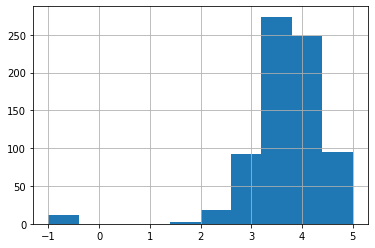

In [16]:
#Creating histograms to visualise the features
df.Rating.hist()

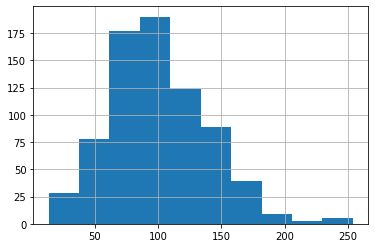

In [17]:
df.avg_salary.hist()

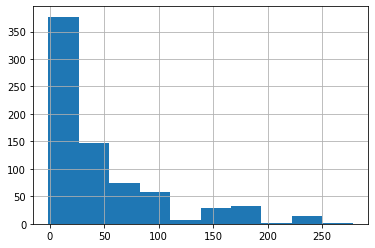

In [18]:
df.company_age.hist()

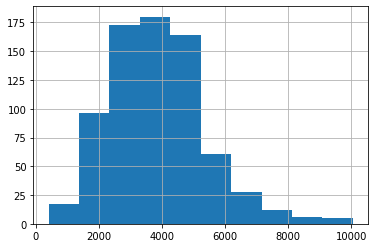

In [19]:
df.desc_length.hist()

Note: these boxplot visualisations are without normalising the data

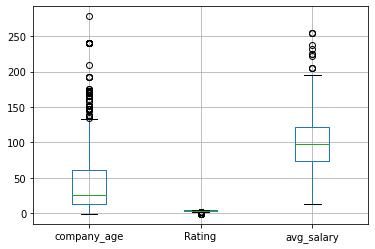

In [20]:
#Trying out some box-plots to view the spread of data and also to detect outliers
df.boxplot(column = ["company_age","Rating","avg_salary"])

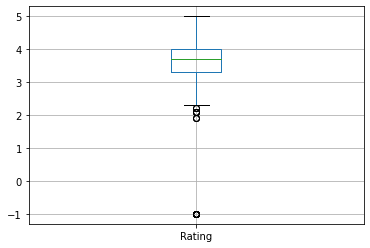

In [21]:
df.boxplot(column = "Rating")

Plotting Correlations

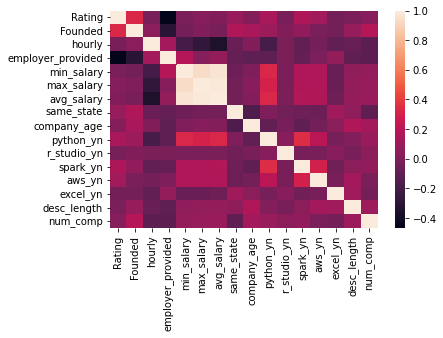

In [25]:
#Checking the correlations between the continous variables
sns.heatmap(df.corr())

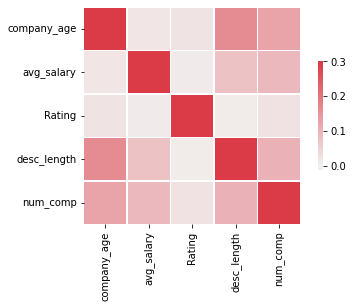

In [28]:
cmap = sns.diverging_palette(20,10,as_cmap=True)
sns.heatmap(df[['company_age','avg_salary','Rating','desc_length','num_comp']].corr(),vmax = 0.3,center = 0,cmap=cmap,
            square = True, linewidths = 0.5,cbar_kws = {"shrink":0.5})

Plotting categorical values

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state_job', 'same_state', 'company_age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simplified_job',
       'simplified_seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [31]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt', 
    'state_job', 'same_state','python_yn','r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simplified_job',
    'simplified_seniority']]

Graph for Location: total = 200


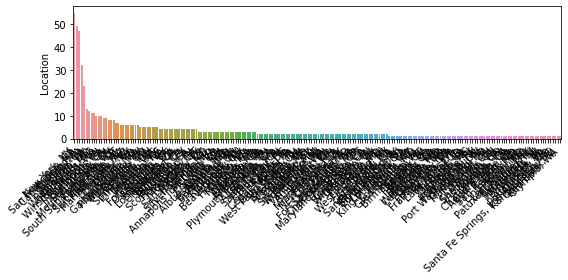

Graph for Headquarters: total = 198


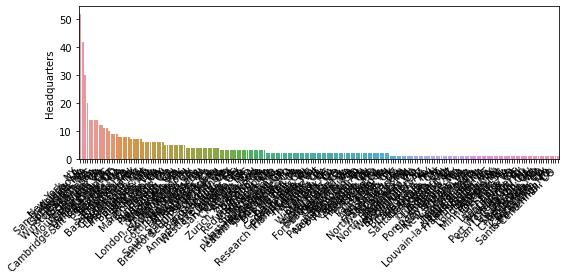

Graph for Size: total = 9


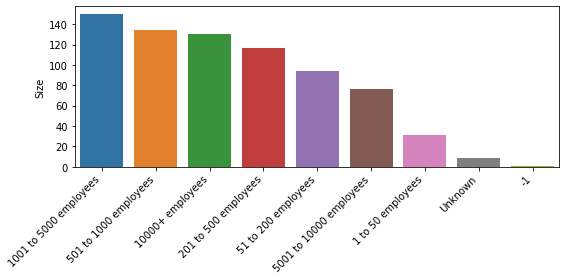

Graph for Type of ownership: total = 11


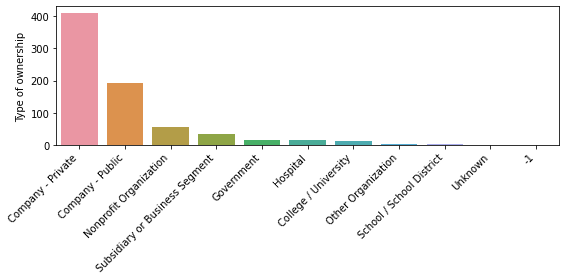

Graph for Industry: total = 60


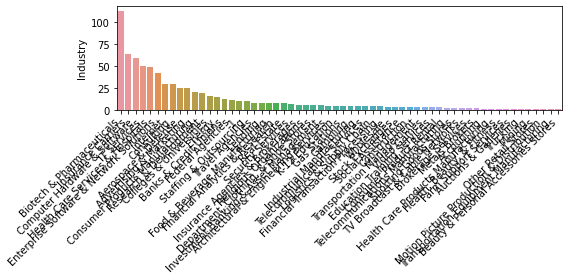

Graph for Sector: total = 25


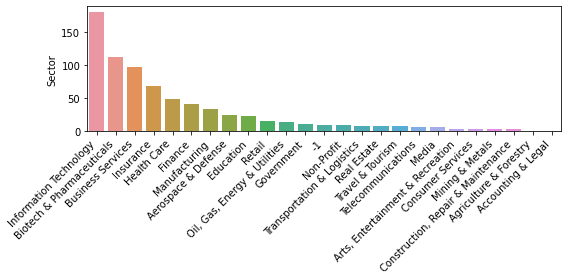

Graph for Revenue: total = 14


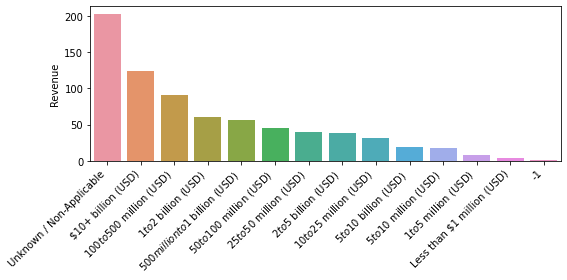

Graph for company_txt: total = 343


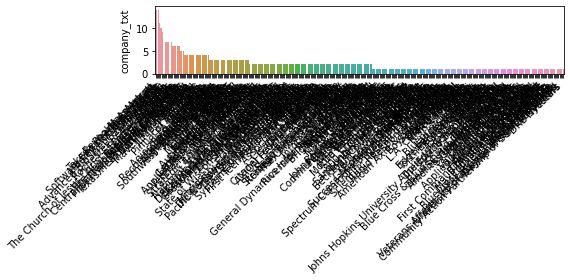

Graph for state_job: total = 37


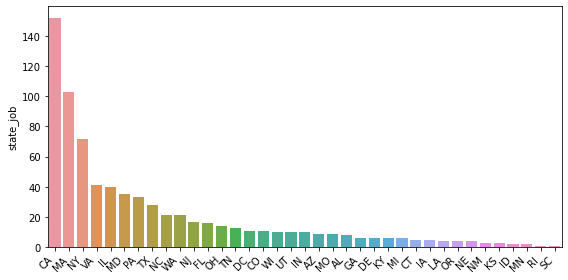

Graph for same_state: total = 2


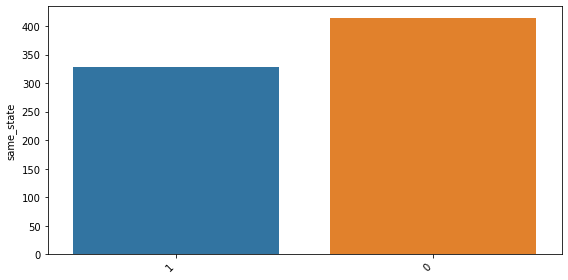

Graph for python_yn: total = 2


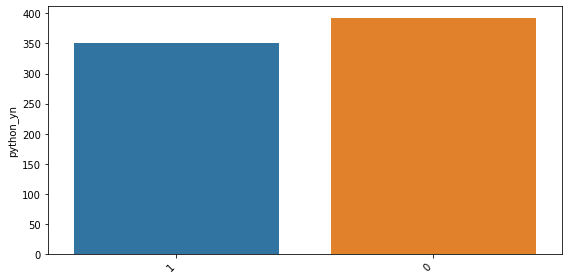

Graph for r_studio_yn: total = 2


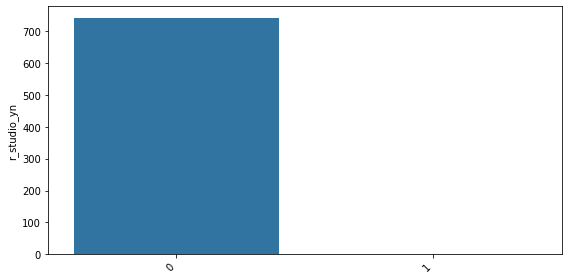

Graph for spark_yn: total = 2


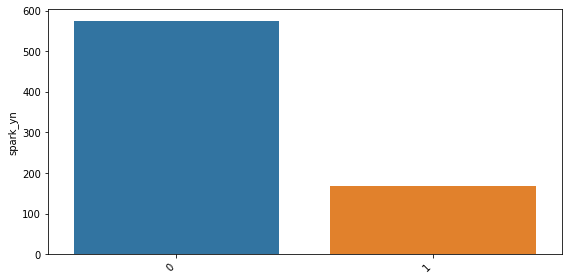

Graph for aws_yn: total = 2


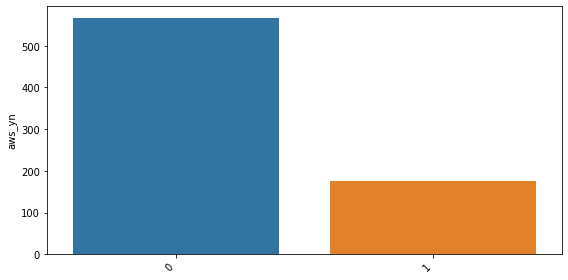

Graph for excel_yn: total = 2


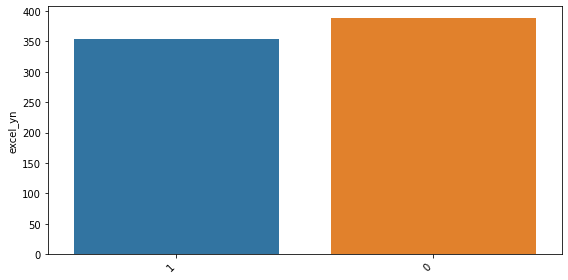

Graph for simplified_job: total = 7


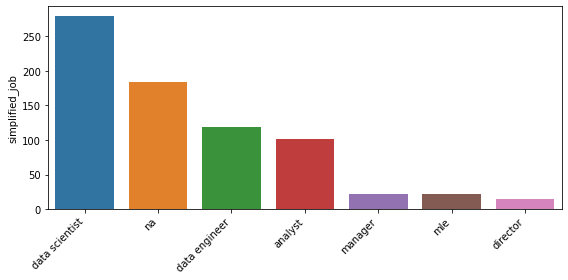

Graph for simplified_seniority: total = 3


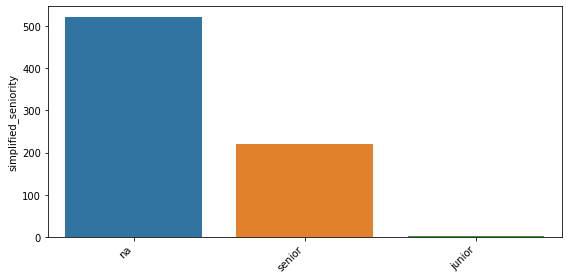

In [49]:
#creating simple bar chars for every categorical value
plt.rcParams["figure.figsize"] = (8, 4)
# plt.rcParams["xtick.labelsize"] = 7
for i in df_cat.columns:
  cat_num = df_cat[i].value_counts()  #so df_cat i th value count
  print("Graph for %s: total = %d" % (i,len(cat_num)))         #string formating in python
  g = sns.barplot(x=cat_num.index, y=cat_num)
  g.set_xticklabels(labels=cat_num.index, rotation=45,ha="right",fontsize=10)
  plt.tight_layout()
  plt.show()

Group for Location total: 20


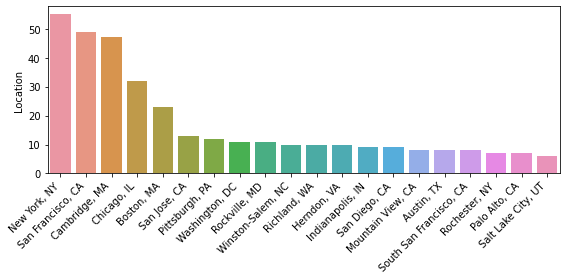

Group for Headquarters total: 20


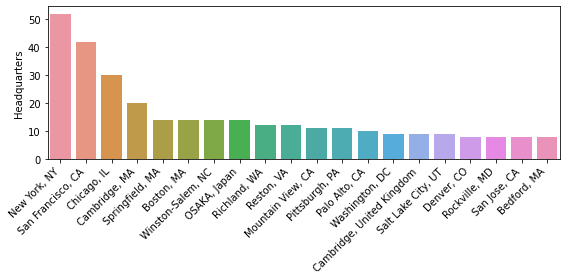

Group for company_txt total: 20


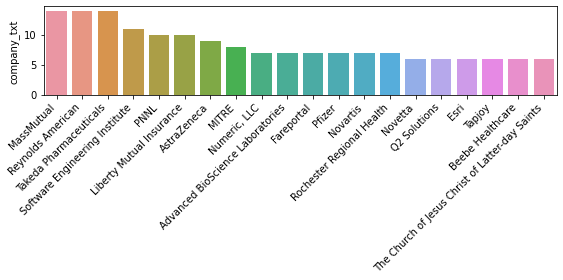

Group for Sector total: 20


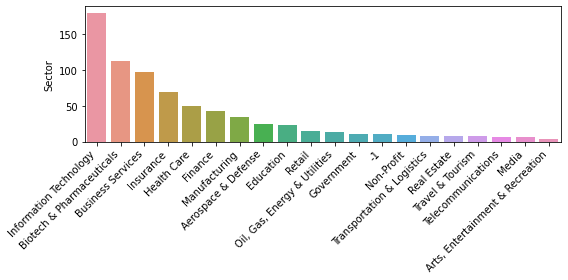

In [51]:
for i in df_cat[["Location","Headquarters","company_txt","Sector"]].columns:
  cat_num = df_cat[i].value_counts()[:20]  #taking only top 20
  print("Group for %s total: %d" % (i,len(cat_num)))
  g = sns.barplot(x=cat_num.index, y=cat_num)
  g.set_xticklabels(labels=cat_num.index, rotation=45,ha="right",fontsize=10)
  plt.tight_layout()
  plt.show()

Pivot Tables

comparing salary of various job profiles like analyst etc

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state_job', 'same_state', 'company_age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simplified_job',
       'simplified_seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [58]:
pd.pivot_table(df,index = "simplified_job",values = "avg_salary").sort_values(by="avg_salary",ascending=False)

,avg_salary
simplified_job,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [59]:
#lets check by how the salary is getting differenciated by seniorirty
pd.pivot_table(df,index = ['simplified_job','simplified_seniority'],values = "avg_salary").sort_values(by="avg_salary",ascending=False)

avg_salary
simplified_job simplified_seniority            
director       na                    168.607143
mle            senior                142.071429
data scientist senior                138.956522
data engineer  senior                124.689189
mle            na                    119.133333
na             senior                109.061404
data scientist na                    107.043011
               junior                106.500000
data engineer  na                     96.701220
manager        na                     84.022727
analyst        senior                 79.092593
na             na                     73.988189
analyst        na                     61.155405
               junior                 56.500000

In [67]:
#lets check by location of the company
# so here we are counting by location which job_profile is generating more revenue 
pd.options.display.max_info_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index = ['simplified_job','state_job'],values = "avg_salary",aggfunc = 'count').sort_values(by="state_job",ascending=False)

,,avg_salary
simplified_job,state_job,
na,WI,4
analyst,WI,3
data scientist,WI,3
na,WA,1
analyst,WA,3
data scientist,WA,17
mle,VA,2
na,VA,5
analyst,VA,6


In [69]:
#let's try with data scientist
pd.pivot_table(df[df.simplified_job == 'data scientist'], index = ['state_job'],values = "avg_salary").sort_values(by='avg_salary',ascending=False)

,avg_salary
state_job,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


Comparing with more pivot tables



In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state_job', 'same_state', 'company_age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simplified_job',
       'simplified_seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [76]:
pd.pivot_table(df,index = ['Rating','Industry','Sector', 'Revenue','num_comp',
                           'hourly', 'employer_provided','python_yn',
                           'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn',
                           'desc_length', 'Type of ownership'],values = "avg_salary",aggfunc = 'count').sort_values(by="avg_salary",ascending=False)


,,,,,,,,,,,,,,avg_salary
Rating,Industry,Sector,Revenue,num_comp,hourly,employer_provided,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_length,Type of ownership,
2.7,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$25 to $50 million (USD),0,0,0,0,0,0,0,1,3776,Company - Private,4
3.3,Food & Beverage Manufacturing,Manufacturing,Unknown / Non-Applicable,0,0,0,0,0,0,0,0,2832,Company - Private,4
3.5,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),0,0,0,0,0,0,0,0,3846,Nonprofit Organization,4
2.6,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,0,0,0,0,0,0,5379,College / University,4
4.0,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),0,1,0,0,0,0,1,0,5160,Hospital,4
3.6,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),0,1,0,0,0,0,0,0,2801,Nonprofit Organization,4
2.4,Food & Beverage Manufacturing,Manufacturing,$100 to $500 million (USD),0,0,0,0,0,0,0,0,2433,Company - Private,4
3.6,Gambling,"Arts, Entertainment & Recreation",$100 to $500 million (USD),0,0,0,0,0,0,0,1,4608,Company - Private,4
3.0,Gas Stations,Retail,$10+ billion (USD),3,0,0,1,0,0,0,0,2133,Company - Private,4


In [77]:
#checking which companies are looking out for python skill and having good revenue
pd.pivot_table(df, index = ['Revenue','python_yn'],values = "avg_salary",aggfunc = 'count').sort_values(by='avg_salary',ascending=False)

avg_salary
Revenue                          python_yn            
Unknown / Non-Applicable         1                 110
                                 0                  93
$10+ billion (USD)               0                  66
                                 1                  58
$100 to $500 million (USD)       0                  47
                                 1                  44
$1 to $2 billion (USD)           1                  44
$500 million to $1 billion (USD) 0                  29
                                 1                  28
$50 to $100 million (USD)        1                  25
$25 to $50 million (USD)         0                  24
$2 to $5 billion (USD)           1                  22
$50 to $100 million (USD)        0                  21
$2 to $5 billion (USD)           0                  17
$1 to $2 billion (USD)           0                  16
$10 to $25 million (USD)         1                  16
                                 0                  16
$25 to $50 million (USD)         1                  16
$5 to $10 billion (USD)          1                  10
$5 to $10 million (USD)          0                   9
                                 1                   9
$5 to $10 billion (USD)          0                   9
$1 to $5 million (USD)           1                   7
Less than $1 million (USD)       1                   3
-1                               0                   1
Less than $1 million (USD)       0                   1
$1 to $5 million (USD)           0                   1

Creation of Word Cloud to check which popular keyowrds are being used

In [84]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [81]:
!pip install -q wordcloud

In [82]:
!pip install -q nltk

In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

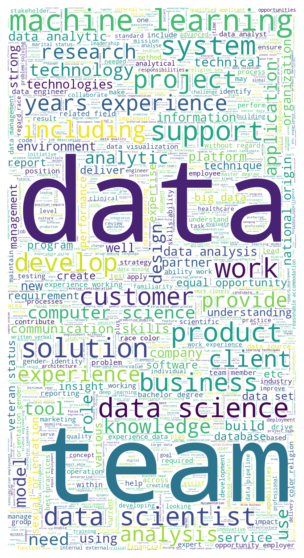

In [91]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()